In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
emp_df=pd.read_csv(r"C:\Users\vivek\Downloads\Untitled Folder\Week 9\employee.csv")

In [76]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [52]:
emp_df.shape

(9, 7)

In [53]:
emp_df.head()


,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


2. Reset the index as "name".

In [77]:
emp_df = emp_df.set_index('name')
emp_df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


3. Select rows for specific names Jack Morgan and Josh wills

In [78]:
emp_df.loc[['Josh Wills','Jack Morgan']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Josh Wills,54.0,52000.0,F,Finance,G3,901
Jack Morgan,32.0,35000.0,M,Finance,G2,674


4. Select data for multiple values "Sales" and “Finance”.

In [79]:
cal=(emp_df['department']=='Sales') | (emp_df['department']=='Finance')
emp_df[cal]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


5. Display employee who has more than 700 performance score

In [80]:
emp_df[emp_df['performance_score']>700]['performance_score']

name
Allen Smith      723
Dheeraj Patel    711
Josh Wills       901
Leo Duck         709
Name: performance_score, dtype: int64

6.Display employee who has more than 500 and less than 700 performance score

In [67]:
emp_df[(emp_df['performance_score']>500) & (emp_df['performance_score']<700)]['performance_score']

name
S Kumar          520
Jack Morgan      674
Ying Chin        556
Satyam Sharma    649
Name: performance_score, dtype: int64

7.Check and handle missing values in the dataset.

In [68]:
emp_df.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [82]:
emp_df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [138]:
#Handling missing value in Colum Age
import math 

#For Skumar, considering the income and grade assume she is beginner in the department 

emp_df1= emp_df.fillna({'age':20},limit=1)

#For Satyam Sharma, considering the grade G3,take the mean 

age_median=math.floor(emp_df[emp_df['grade']=='G3']['age'].median())
emp_df1= emp_df1.fillna({'age':age_median},limit=1)
emp_df1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,20.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,49.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [139]:
#Handling missing value in Colum income


#For Allen Smith and James Authur, considering the grade G3,take the median

income_median=math.floor(emp_df[emp_df['grade']=='G3']['income'].median())
emp_df1= emp_df1.fillna({'income':income_median},limit=2)
emp_df1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,62000.0,NaN,Operations,G3,723
S Kumar,20.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,49.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,62000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [140]:
#Handling missing value in Colum gender


#For Allen Smith and Satyam Sharma, considering the name both are name of male
emp_df1= emp_df1.fillna({'gender':'M'},limit=2)
emp_df1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,62000.0,M,Operations,G3,723
S Kumar,20.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,49.0,62000.0,M,Sales,G3,649
James Authur,54.0,62000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#8. Check the outliers and handle outliers in performance score using Percentiles.

Text(0.5, 1.0, 'Performance Score')

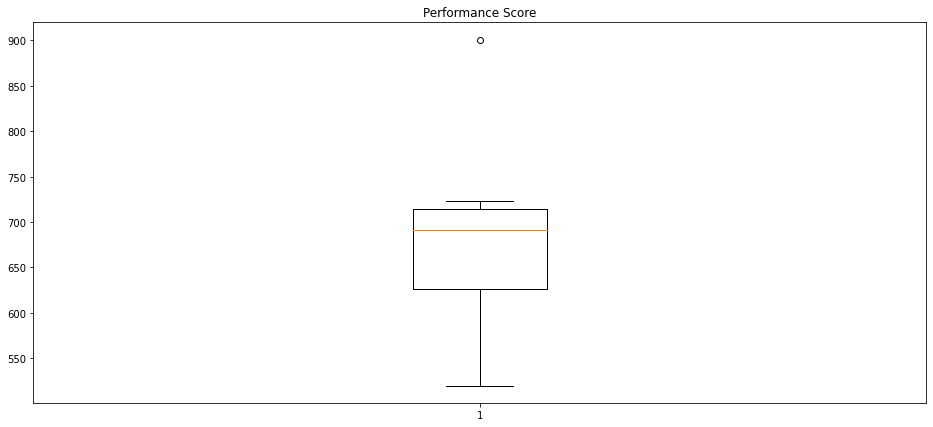

In [161]:
plt.figure(figsize=(16,7))
plt.boxplot(emp_df1['performance_score'])
plt.title("Performance Score")

In [142]:
Q1=np.percentile(emp_df1['performance_score'],25,interpolation='midpoint')
Q1

556.0

In [143]:
Q2=np.percentile(emp_df1['performance_score'],50,interpolation='midpoint')
Q2

674.0

In [144]:
Q3=np.percentile(emp_df1['performance_score'],73,interpolation='midpoint')
Q3

710.0

In [145]:
IQR=Q3-Q1
low_limit=Q1-(1.5*IQR)
upp_limit=Q3+(1.5*IQR)
print("Lower Limit", low_limit)
print("Upper Limit", upp_limit)
      
      

Lower Limit 325.0
Upper Limit 941.0


In [146]:
emp_df1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,62000.0,M,Operations,G3,723
S Kumar,20.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,49.0,62000.0,M,Sales,G3,649
James Authur,54.0,62000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [147]:
outlr=emp_df1[(emp_df1.performance_score<low_limit ) | (emp_df1.performance_score>upp_limit)]
outlr




,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,62000.0,F,Operations,G3,53


In [148]:
indx= emp_df1.performance_score<low_limit
indx


name
Allen Smith      False
S Kumar          False
Jack Morgan      False
Ying Chin        False
Dheeraj Patel    False
Satyam Sharma    False
James Authur      True
Josh Wills       False
Leo Duck         False
Name: performance_score, dtype: bool

In [149]:
emp_df1.loc[indx].index
emp_df1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,62000.0,M,Operations,G3,723
S Kumar,20.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,49.0,62000.0,M,Sales,G3,649
James Authur,54.0,62000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [163]:
emp_df1.drop(["James Authur"],inplace=True)


KeyError: "['James Authur'] not found in axis"

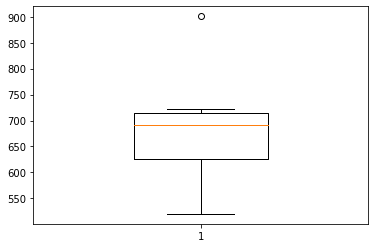

In [164]:


plt.figure()
plt.boxplot(emp_df1['performance_score'],widths=0.4)
plt.show()


In [159]:
emp_df1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,62000.0,M,Operations,G3,723
S Kumar,20.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,49.0,62000.0,M,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


9. Check the gender column and do Dummy encoding.

In [165]:
emp_df1=pd.get_dummies(emp_df1,columns=['gender'],drop_first=True)

In [166]:
emp_df1

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45.0,62000.0,Operations,G3,723,1
S Kumar,20.0,16000.0,Finance,G0,520,0
Jack Morgan,32.0,35000.0,Finance,G2,674,1
Ying Chin,45.0,65000.0,Sales,G3,556,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,0
Satyam Sharma,49.0,62000.0,Sales,G3,649,1
Josh Wills,54.0,52000.0,Finance,G3,901,0
Leo Duck,23.0,98000.0,Sales,G4,709,1


10.Do the standard scaling on the feature performance score

In [174]:
emp_df1.columns

Index(['age', 'income', 'department', 'grade', 'performance_score',
       'gender_M'],
      dtype='object')

In [175]:
X=emp_df1.drop(['performance_score','department','grade'],axis=1)
Y=emp_df1['performance_score']

In [171]:
from sklearn import preprocessing

In [176]:
standardization=preprocessing.StandardScaler()
X=standardization.fit_transform(X)

In [177]:
X=pd.DataFrame(X)

In [178]:

X.describe()

,0,1,2
count,8.000000,8.000000e+00,8.000000
mean,0.000000,2.775558e-17,0.000000
std,1.069045,1.069045e+00,1.069045
min,-1.458217,-1.670834e+00,-1.000000
25%,-0.760809,-6.045782e-01,-1.000000
50%,0.105668,1.319080e-01,0.000000
75%,0.739675,3.847316e-01,1.000000
max,1.415949,1.934650e+00,1.000000
